In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df=pd.read_csv('BostonHousing.csv')

In [3]:
df.head()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.columns

Index(['Crime_rate', 'zn', 'indus', 'chas', 'nox', 'rm', 'Age', 'Distance',
       'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
df.dtypes

Crime_rate    float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
Age           float64
Distance      float64
rad             int64
tax             int64
ptratio       float64
b             float64
lstat         float64
medv          float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crime_rate  506 non-null    float64
 1   zn          506 non-null    float64
 2   indus       506 non-null    float64
 3   chas        506 non-null    int64  
 4   nox         506 non-null    float64
 5   rm          501 non-null    float64
 6   Age         506 non-null    float64
 7   Distance    506 non-null    float64
 8   rad         506 non-null    int64  
 9   tax         506 non-null    int64  
 10  ptratio     506 non-null    float64
 11  b           506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.describe()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            5
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

In [9]:
df['rm']=df['rm'].fillna(df['rm'].mean())

In [10]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            0
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

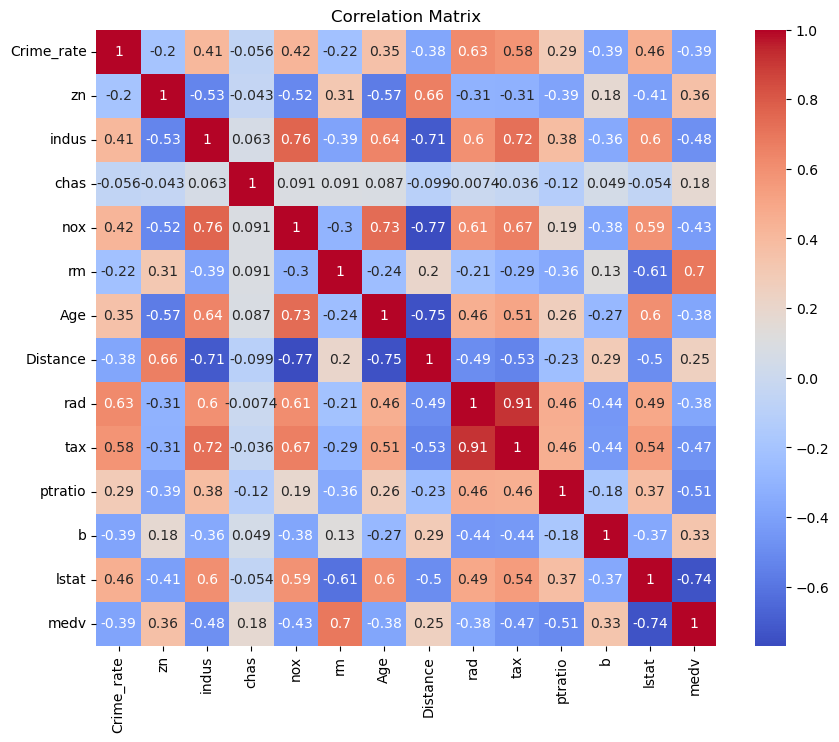

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
x=df.drop(['medv'],axis=1)
y=df['medv']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [15]:
x_train.shape,y_train.shape

((404, 13), (404,))

In [16]:
x_test.shape,y_test.shape

((102, 13), (102,))

In [19]:
model=Sequential()
model.add(Dense(128, input_shape=(13, ),activation='relu',name='dense1'))
model.add(Dense(64,activation='relu',name='dense2'))
model.add(Dense(1,activation='linear',name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense1 (Dense)                  │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history=model.fit(x_train,y_train,epochs=100, validation_split=0.05, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 621.0061 - mae: 23.0634 - val_loss: 491.8074 - val_mae: 20.6469
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 533.3857 - mae: 21.0932 - val_loss: 429.4060 - val_mae: 19.0960
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 492.1747 - mae: 19.9190 - val_loss: 333.4753 - val_mae: 16.4112
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 372.2969 - mae: 16.4708 - val_loss: 205.9612 - val_mae: 11.8896
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 238.4092 - mae: 12.7178 - val_loss: 99.1509 - val_mae: 7.4280
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 169.9467 - mae: 10.2374 - val_loss: 68.5188 - val_mae: 6.5620
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 113.8492 - mae: 8.3995 - val_loss: 64.4155 - val_mae: 6.2182
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 104.6001 - mae: 7.7506 - val_loss: 58.8505 - val_mae: 5.5203
Epoch 9/100
12/12 

In [22]:
metrics=model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.4033 - mae: 2.2029


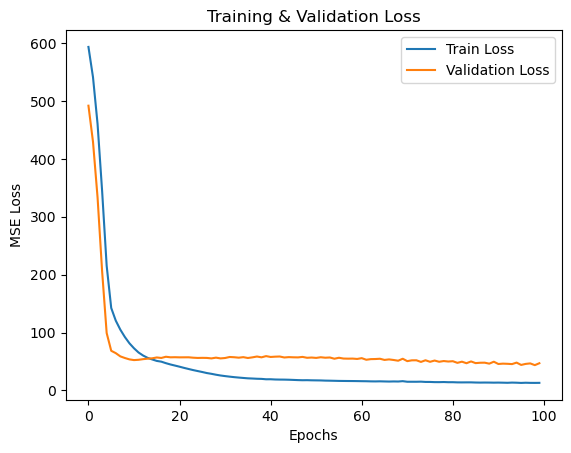

In [23]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


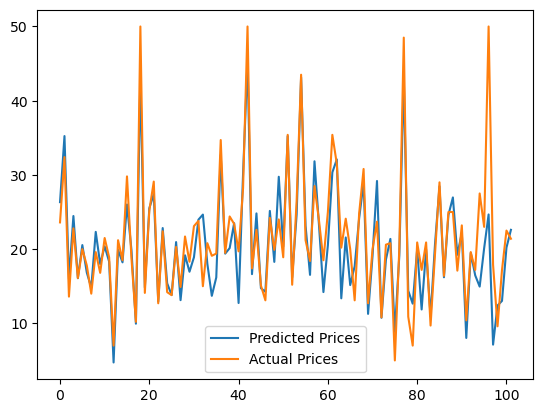

In [24]:
y_pred=model.predict(x_test)
y_test=np.array(y_test).reshape(-1,1)
plt.plot(y_pred,label='Predicted Prices')
plt.plot(y_test, label='Actual Prices')
plt.legend()
plt.show()

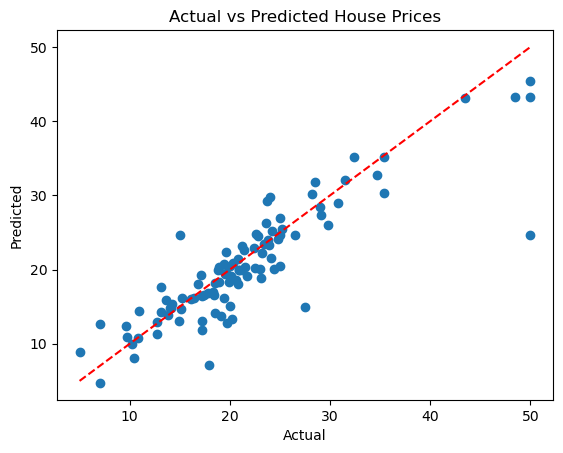

In [25]:
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.show()